In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os


In [2]:
train_data_dir='data/train/'
validation_data_dir='data/test/'

In [3]:

train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

In [4]:
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(48, 48),
					batch_size=32,
					class_mode='categorical',
					shuffle=True)

Found 2870 images belonging to 4 classes.


In [5]:
validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(48, 48),
							batch_size=32,
							class_mode='categorical',
							shuffle=True)

Found 394 images belonging to 4 classes.


In [6]:
class_labels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [7]:
img, label = train_generator.__next__()

In [8]:
from time import time
from keras.callbacks import TensorBoard

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(4, activation='softmax'))


model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 128)       0

In [10]:
train_path = "data/train/"
test_path = "data/test"

In [11]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

print(num_train_imgs)
print(num_test_imgs)
epochs=30

2870
394


In [12]:
history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//32,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//32,
                )

Epoch 1/30
89/89 [==============================] - 31s 307ms/step - loss: 1.2825 - accuracy: 0.3890 - val_loss: 1.8503 - val_accuracy: 0.2344
Epoch 2/30
89/89 [==============================] - 8s 90ms/step - loss: 1.0348 - accuracy: 0.5567 - val_loss: 2.1667 - val_accuracy: 0.2292
Epoch 3/30
89/89 [==============================] - 8s 90ms/step - loss: 0.9163 - accuracy: 0.6089 - val_loss: 2.1827 - val_accuracy: 0.2760
Epoch 4/30
89/89 [==============================] - 8s 89ms/step - loss: 0.8130 - accuracy: 0.6596 - val_loss: 1.7626 - val_accuracy: 0.4479
Epoch 5/30
89/89 [==============================] - 8s 91ms/step - loss: 0.7355 - accuracy: 0.6970 - val_loss: 2.1149 - val_accuracy: 0.5156
Epoch 6/30
89/89 [==============================] - 8s 92ms/step - loss: 0.6996 - accuracy: 0.7132 - val_loss: 2.1882 - val_accuracy: 0.5026
Epoch 7/30
89/89 [==============================] - 8s 90ms/step - loss: 0.6349 - accuracy: 0.7505 - val_loss: 1.8027 - val_accuracy: 0.5260
Epoch 8/30


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


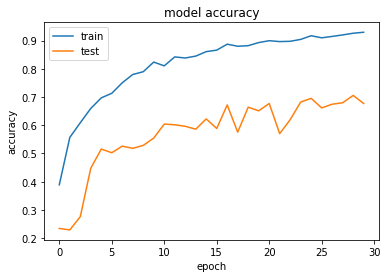

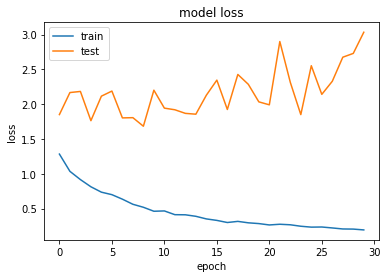

In [14]:
# Visualize training history
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
model.save('model_file.h5')